![Spam email image](https://www.howtogeek.com/wp-content/uploads/2019/04/xemail-bomb.jpg.pagespeed.gp+jp+jw+pj+ws+js+rj+rp+rw+ri+cp+md.ic.UUnEG5yZbp.jpg)
# <center><font color = #2E5266>Error Types and Costs: Case Studies</font></center>
<center>Statistical models can help us understand and make predictions about the world. But, no model is perfect. Through two real-life case studies of applied machine learning, we will explore how type I and type II errors have consequences for decision-making in different contexts, and how trying to reduce one type can increase another.</center>

***
Before we begin, recall the definitions of the following terms:
* <font color = #6E8898>Type I Error</font> is ...
* <font color = #6E8898>Type II Error</font> is ...
* <font color = #6E8898>Precision</font> is ...
* <font color = #6E8898>Recall</font> is ...

Now we will explore what is called a <font color = #6E8898>confusion matrix</font>. Now, don't be confused by the confusion matrix. We will explore what exactly it is below.

By definition, a confusion matrix $C$ is such that a cell at position $(1,3)$ called $C_{(1,3)}$ is known to be in group 1 and predicted to be in group 3.
![](data/matrix_c.png)

## Case Study: SMS Spam Data

In this dataset, we will be studying a collection of SMS messages. Some of these messages are ham ("real" messages), and some are spam. To read more about this dataset, please take a look at the `data/readme.txt` file, or visit https://archive.ics.uci.edu/ml/datasets/sms+spam+collection.

In [4]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import numpy as np
from scipy import stats
import random

# Defining barchart function 
def barchart(array, x_label):
    counts = np.bincount(array)
    x_axis_labels = [str(i) for i in range(1, len(counts))]
    plt.bar(x_axis_labels, counts[1:])
    plt.xlabel(x_label)
    plt.ylabel("Frequency")

# Defining histogram function
def histogram(array, x_label):
    plt.hist(array)
    plt.xlabel(x_label)
    plt.ylabel("Frequency")

In [5]:
raw_data = Table.read_table("data/SMSSpamCollection.csv")
raw_data

Class,Text
ham,"Go until jurong point, crazy.. Available only in bugis n ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21s ...
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives around here t ..."
spam,FreeMsg Hey there darling it's been 3 week's now and no ...
ham,Even my brother is not like to speak with me. They treat ...
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nu ...
spam,WINNER!! As a valued network customer you have been sele ...
spam,Had your mobile 11 months or more? U R entitled to Updat ...


In [6]:
#split training and testing
testing = random.sample(range(raw_data.num_rows), raw_data.num_rows//10)
training = [i for i in range(raw_data.num_rows) if i not in testing]

testing = raw_data.take[testing]
testing

Class,Text
ham,Or u ask they all if next sat can a not. If all of them ...
ham,"House-Maid is the murderer, coz the man was murdered on ..."
ham,And do you have any one that can teach me how to ship cars.
ham,if you aren't here in the next <#> hours imma fl ...
ham,Me sef dey laugh you. Meanwhile how's my darling anjie!
ham,No need lar i go engin? Cos my sis at arts today...
ham,Dude sux for snake. He got old and raiden got buff
ham,"Set a place for me in your heart and not in your mind, a ..."
ham,"Nah can't help you there, I've never had an iphone"
ham,K...k:)why cant you come here and search job:)


In [7]:
training = raw_data.take[training]
training

Class,Text
ham,"Go until jurong point, crazy.. Available only in bugis n ..."
ham,Ok lar... Joking wif u oni...
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21s ...
ham,U dun say so early hor... U c already then say...
ham,"Nah I don't think he goes to usf, he lives around here t ..."
spam,FreeMsg Hey there darling it's been 3 week's now and no ...
ham,Even my brother is not like to speak with me. They treat ...
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nu ...
spam,WINNER!! As a valued network customer you have been sele ...
spam,Had your mobile 11 months or more? U R entitled to Updat ...


If you read the some of the texts, it is pretty easy to distinguish spam vs ham. However, we are interested in getting a program to tell them apart. 

Lets try looking at some differences, like the number of capital letters in a text:

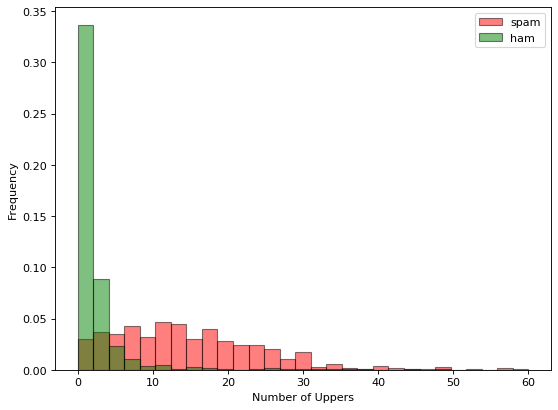

In [8]:
hams = training.where("Class", are.equal_to("ham"))
ham_texts = hams.column("Text")

spams = training.where("Class", are.equal_to("spam"))
spam_texts = spams.column("Text")

min_len = np.min([len(spam_texts), len(ham_texts)])

ham_vals = []
spam_vals = []

for count in range(len(ham_texts)):
    ham_vals += [(len([i for i in ham_texts[count] if i.isupper()]))]
    
for count in range(len(spam_texts)):
    spam_vals += [(len([i for i in spam_texts[count] if i.isupper()]))]

bins = np.linspace(0, 60, 30)

#all_vals_upper = ham_vals + spam_vals
#stdev = np.std(all_vals_upper)
#ham_vals = [i/stdev for i in ham_vals]
#spam_vals = [i/stdev for i in spam_vals]
#bins = np.linspace(0, 60/stdev, 30)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(spam_vals, alpha=.5, bins=bins, color="red", label="spam", density=True)
plt.hist(ham_vals, alpha=.5, bins=bins, color="green", label="ham", density=True)
plt.xlabel("Number of Uppers")
plt.ylabel("Frequency")
plt.legend()

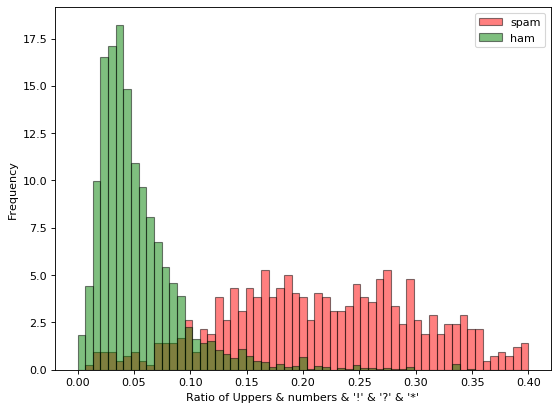

In [59]:
hams = training.where("Class", are.equal_to("ham"))
ham_texts = hams.column("Text")

spams = training.where("Class", are.equal_to("spam"))
spam_texts = spams.column("Text")

ham_vals = []
spam_vals = []
catch=["!", "?", "*"]+[str(i) for i in range(0, 10, 1)]

for count in range(len(ham_texts)):
    ham_vals += [(len([i for i in ham_texts[count] if (i.isupper() or i in catch)]))/len(ham_texts[count])]
    
for count in range(len(spam_texts)):
    spam_vals += [(len([i for i in spam_texts[count] if (i.isupper() or i in catch)]))/len(spam_texts[count])]

bins = np.linspace(0, 0.4, 60)

all_vals_upper = ham_vals + spam_vals
upper_stdev = np.std(all_vals_upper)
ham_vals_upper = [i/upper_stdev for i in ham_vals]
spam_vals_upper = [i/upper_stdev for i in spam_vals]
#bins = np.linspace(0, 60/stdev, 30)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(spam_vals, alpha=.5, bins=bins, color="red", label="spam", density=True)
plt.hist(ham_vals, alpha=.5, bins=bins, color="green", label="ham", density=True)
plt.xlabel("Ratio of Uppers & numbers & '!' & '?' & '*'")
plt.ylabel("Frequency")
plt.legend()

As you can see, the histogram of spam and ham are very different; spam messages have a lot more capital letters per message than ham messages. However, this is one of many aspects that can differentiate spam vs ham messages. Write other features we can use to distinguish spam vs ham message in the box below.

(Double-click here)

How about we choose a specific group of words to classify these messages; say we have certain "target words," and we count the number of instances those words are in the messages. We can expect a distinction between spam and ham messages, assuming we chose the right words. We will be having you choosing 7 distinct words to classify these messages. Here are some helpful guidelines in choosing these words to make the best classifier:

    - DO NOT chose half of the 7 words that are common among one group, then the other half among the other. Eg, do not choose 3-4 words that are associated with ham messages, then 3-4 words that are associated with spam messages. These words are to be weighted EQUALY, and so getting a number like 4 could mean a message is either spam or ham. Try to find 7 words that are all associated with ham messages, or 7 words that are associated with spam messages.
    
    - Try to avoid words that are associated with capital letters. Eg, try to avoid words like "ALERT" or "ERROR". The reason for this is because we are planning to build a K-nearest neigbors classifier (explained more below), with both the capial-letters attribute and the group-of-letters attribute. Therefore, we would like to use words are not also commonly capitalized.
    
    - Need help thinking of words? Try going to the data folder and opening SMSSpamCollection.txt to read some spam/ham messages for inspiration!

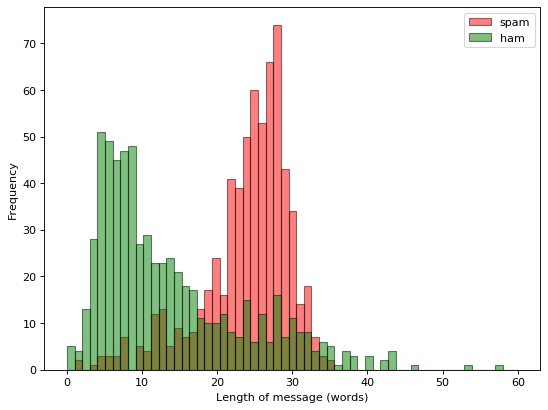

In [10]:
count = 0
ham_vals = []
spam_vals = []

while count < min_len:
    ham_vals += [(len([i for i in ham_texts[count].split(" ")]))]
    spam_vals += [(len([i for i in spam_texts[count].split(" ")]))]
    count+=1

bins = np.linspace(0, 60, 60)

all_vals_upper = ham_vals + spam_vals
stdev = np.std(all_vals_upper)
ham_vals_word = [i/stdev for i in ham_vals]
spam_vals_word = [i/stdev for i in spam_vals]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(spam_vals, alpha=.5, bins=bins, color="red", label="spam")
plt.hist(ham_vals, alpha=.5, bins=bins, color="green", label="ham")
plt.xlabel("Length of message (words)")
plt.ylabel("Frequency")
plt.legend()

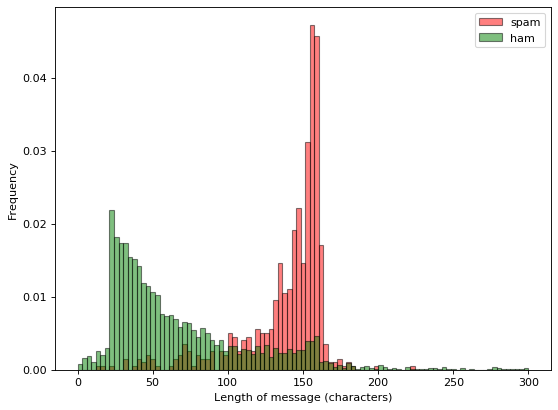

In [60]:
ham_vals = []
spam_vals = []

for count in range(len(ham_texts)):
    ham_vals += [(len([i for i in ham_texts[count]]))]
    
for count in range(len(spam_texts)):
    spam_vals += [(len([i for i in spam_texts[count]]))]

bins = np.linspace(0, 300, 100)

all_vals_upper = ham_vals + spam_vals
len_stdev = np.std(all_vals_upper)
ham_vals_len = [i/len_stdev for i in ham_vals]
spam_vals_len = [i/len_stdev for i in spam_vals]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(spam_vals, alpha=.5, bins=bins, color="red", label="spam", density=True)
plt.hist(ham_vals, alpha=.5, bins=bins, color="green", label="ham", density=True)
plt.xlabel("Length of message (characters)")
plt.ylabel("Frequency")
plt.legend()

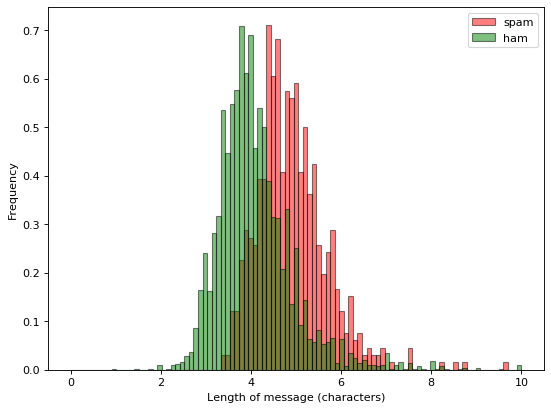

In [26]:
ham_vals = []
spam_vals = []

for count in range(len(ham_texts)):
    ham_vals += [(len([i for i in ham_texts[count] if i is not " "]))/(len([i for i in ham_texts[count].split(" ")]))]
    
for count in range(len(spam_texts)):
    spam_vals += [(len([i for i in spam_texts[count] if i is not " "]))/(len([i for i in spam_texts[count].split(" ")]))]

bins = np.linspace(0, 10, 100)

all_vals_upper = ham_vals + spam_vals
stdev = np.std(all_vals_upper)
ham_vals_len = [i/stdev for i in ham_vals]
spam_vals_len = [i/stdev for i in spam_vals]

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(spam_vals, alpha=.5, bins=bins, color="red", label="spam", density=True)
plt.hist(ham_vals, alpha=.5, bins=bins, color="green", label="ham", density=True)
plt.xlabel("Average Length of word (characters)")
plt.ylabel("Frequency")
plt.legend()

Using num of characters and number of ratio of capitals letters:

Text(0, 0.5, 'Total number of characters (Normalized)')

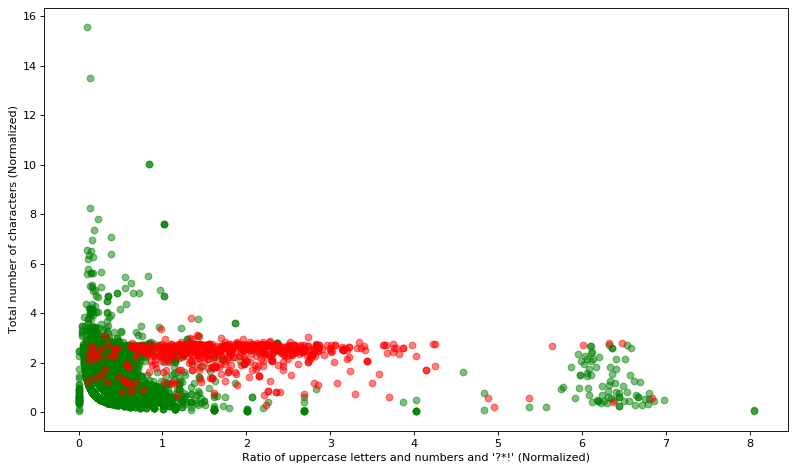

In [62]:
plt.figure(num=None, figsize=(12, 7), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(ham_vals_upper, ham_vals_len, color="green", alpha=0.5)
plt.scatter(spam_vals_upper, spam_vals_len, color="red", alpha=0.5)
plt.xlabel("Ratio of uppercase letters and numbers and '?*!' (Normalized)")
plt.ylabel("Total number of characters (Normalized)")
#plt.axis([0,4, 0, 4])

three nearest neighbors: __EXPLAIN 3 NEAREST NEIGHBORD__

In [115]:
total_x = ham_vals_upper+spam_vals_upper
total_y = ham_vals_len+spam_vals_len
ham_length=len(ham_vals_upper)

all_points = []
for i in range(len(total_x)):
    if i < ham_length:
        all_points += [[total_x[i], total_y[i], True]]
    else:
        all_points += [[total_x[i], total_y[i], False]]
all_points

[[0.2262601324271587, 1.4762427305792434, True],
 [0.245236788695243, 2.7240193242831277, True],
 [0.16106653494814688, 1.0368847750497066, True],
 [0.0, 1.159905002597977, True],
 [0.5183413942876727, 0.9665875021649808, True],
 [0.5589956212906274, 0.8962902292802549, True],
 [0.38011702247762663, 0.8787159110590734, True],
 [0.3852537389975946, 2.6009990967348573, True],
 [0.38011702247762663, 0.8787159110590734, True],
 [0.20658533830305795, 0.8084186381743476, True],
 [0.6553741766855632, 0.5096552284142626, True],
 [0.5482457054965769, 0.9138645475014364, True],
 [1.7598010299890121, 0.47450659197189965, True],
 [0.5279403089967036, 1.5816886399063321, True],
 [3.058412824532628, 1.5289656852427878, True],
 [0.19797761587376386, 0.8435672746167105, True],
 [0.3751154827081842, 4.006944554429375, True],
 [0.2500769884721228, 0.6678240924048958, True],
 [0.2568358259983964, 1.3004995483674286, True],
 [0.3105531229392375, 2.688870687840765, True],
 [0.2585830084881814, 2.5834247785

In [116]:
texts = testing.column("Text")

vals = []
catch=["!", "?", "*"]+[str(i) for i in range(0, 10, 1)]

for count in range(len(texts)):
    vals += [(len([i for i in texts[count] if (i.isupper() or i in catch)]))/len(texts[count])]

upper_stdev = np.std(vals)
vals_x = [i/upper_stdev for i in vals]
#bins = np.linspace(0, 60/stdev, 30)

vals = []
    
for count in range(len(texts)):
    vals += [(len([i for i in texts[count]]))]

len_stdev = np.std(vals)
vals_y = [i/len_stdev for i in vals]

In [117]:
test_points = [[vals_x[i], vals_y[i], testing.column("Class")[i]=="ham"] for i in range(0, len(vals_x))]
test_points

[[0.22626013242715873, 1.4762427305792434, True],
 [0.24523678869524304, 2.7240193242831277, True],
 [0.1610665349481469, 1.0368847750497066, True],
 [0.0, 1.159905002597977, True],
 [0.5183413942876728, 0.9665875021649808, True],
 [0.5589956212906275, 0.8962902292802549, True],
 [0.3801170224776267, 0.8787159110590734, True],
 [0.38525373899759463, 2.6009990967348573, True],
 [0.3801170224776267, 0.8787159110590734, True],
 [0.20658533830305797, 0.8084186381743476, True],
 [0.6553741766855633, 0.5096552284142626, True],
 [0.548245705496577, 0.9138645475014364, True],
 [1.7598010299890123, 0.47450659197189965, True],
 [0.5279403089967037, 1.5816886399063321, True],
 [3.0584128245326285, 1.5289656852427878, True],
 [0.1979776158737639, 0.8435672746167105, True],
 [0.37511548270818423, 4.006944554429375, True],
 [1.7056533059893506, 2.7415936425043093, False],
 [0.25007698847212284, 0.6678240924048958, True],
 [0.25683582599839644, 1.3004995483674286, True],
 [0.31055312293923754, 2.6888

In [120]:
cor_ham = 0
cor_spam = 0
mislabel_as_ham = 0
mislabel_as_spam = 0
k = 3
for point in test_points:
    def distance(x, y):
       return ((x-point[0])**2 + (y-point[1])**2)**0.5
    distance_distinction = [[distance(x, y), z] for x,y,z in all_points]
    distance_distinction.sort()
    top = distance_distinction[0:k]
    hams = np.sum([i[1] for i in top])
    if (hams >= k//2+1) and (point[2]):
        cor_ham+=1
    elif (hams >= k//2+1) and (point[2]==False):
        mislabel_as_ham+=1
    elif (hams < k//2+1) and (point[2]==False):
        cor_spam+=1
    elif (hams < k//2+1) and (point[2]):
        mislabel_as_spam+=1
        
print("cor_ham: {}".format(cor_ham))
print("cor_spam: {}".format(cor_spam))
print("mislabel_as_ham: {}".format(mislabel_as_ham))
print("mislabel_as_spam: {}".format(mislabel_as_spam))

cor_ham: 455
cor_spam: 72
mislabel_as_ham: 6
mislabel_as_spam: 9


In [121]:
precision = (cor_ham)/(cor_ham+mislabel_as_ham)
recall = (cor_ham)/(cor_ham+mislabel_as_spam)
accuracy = (cor_ham+cor_spam)/(cor_ham+cor_spam+mislabel_as_ham+mislabel_as_spam)
        
print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("accuracy: {}".format(accuracy))

precision: 0.9869848156182213
recall: 0.9806034482758621
accuracy: 0.9723247232472325
